In [1]:
import csv
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pylab as pb
import seaborn as sns
from scipy import stats

%matplotlib inline

## 1. Reading and storing the data

In [106]:
# Opening data
with open('PD1.csv', 'rb') as f:
    reader = csv.reader(f)
    data05 = list(reader)
    
with open('PD07.csv', 'rb') as f:
    reader = csv.reader(f)
    data07 = list(reader)
    
with open('PD10.csv', 'rb') as f:
    reader = csv.reader(f)
    data10 = list(reader)

In [107]:
# Passing data to lists, then to arrays (should change this to make it all in one) 
firmID05 = []
size05 = []
wage05 = []
profit05 = []
skill_w05 = []
firm_age05 = []
industry_code05 = []
region05 = []
for row in data05[1:]:
    firmID05.append(row[0])
    size05.append(int(row[1]))
    wage05.append(float(row[2]))
    profit05.append(float(row[3]))
    skill_w05.append(float(row[4]))
    if row[5]== '':
        firm_age05.append(0)
    else:
        firm_age05.append(float(row[5]))
    if row[6]== '':
        industry_code05.append(0)
    else:
        industry_code05.append(int(row[6]))
    region05.append(int(row[7]))
# Firm unique code (string)
firmID05 = np.asarray(firmID05)
# Firm size in workers (int)
size05 = np.asarray(size05)
# Daily average wage for each firm, in euros (float)
wage05 = np.asarray(wage05)
# Declared average profits for each firm per year, in euros (float)
profit05 = np.asarray(profit05)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w05 = np.asarray(skill_w05)
# Firm age in years (float) Missing observations have a 0.
firm_age05 = np.asarray(firm_age05)
# Industry codes (int) Missing observations have a 0.
industry_code05 = np.asarray(industry_code05)
# Regional code (int)
region05 = np.asarray(region05)

In [108]:
firmID07 = []
size07 = []
wage07 = []
profit07 = []
skill_w07 = []
firm_age07 = []
industry_code07 = []
region07 = []
for row in data07[1:]:
    firmID07.append(row[0])
    size07.append(int(row[1]))
    wage07.append(float(row[2]))
    profit07.append(float(row[3]))
    skill_w07.append(float(row[4]))
    if row[5]== '':
        firm_age07.append(0)
    else:
        firm_age07.append(float(row[5]))
    if row[6]== '':
        industry_code07.append(0)
    else:
        industry_code07.append(int(row[6]))
    region07.append(int(row[7]))
# Firm unique code (string)
firmID07 = np.asarray(firmID07)
# Firm size in workers (int)
size07 = np.asarray(size07)
# Daily average wage for each firm, in euros (float)
wage07 = np.asarray(wage07)
# Declared average profits for each firm per year, in euros (float)
profit07 = np.asarray(profit07)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w07 = np.asarray(skill_w07)
# Firm age in years (float) Missing observations have a 0.
firm_age07 = np.asarray(firm_age07)
# Industry codes (int) Missing observations have a 0.
industry_code07 = np.asarray(industry_code07)
# Regional code (int)
region07 = np.asarray(region07)

In [109]:
# Passing data to lists, then to arrays (should change this to make it all in one) 
firmID10 = []
size10 = []
wage10 = []
profit10 = []
skill_w10 = []
firm_age10 = []
industry_code10 = []
region10 = []
for row in data10[1:]:
    firmID10.append(row[0])
    size10.append(int(row[1]))
    wage10.append(float(row[2]))
    profit10.append(float(row[3]))
    skill_w10.append(float(row[4]))
    if row[5]== '':
        firm_age10.append(0)
    else:
        firm_age10.append(float(row[5]))
    if row[6]== '':
        industry_code10.append(0)
    else:
        industry_code10.append(int(row[6]))
    region10.append(int(row[7]))
# Firm unique code (string)
firmID10 = np.asarray(firmID10)
# Firm size in workers (int)
size10 = np.asarray(size10)
# Daily average wage for each firm, in euros (float)
wage10 = np.asarray(wage10)
# Declared average profits for each firm per year, in euros (float)
profit10 = np.asarray(profit10)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w10 = np.asarray(skill_w10)
# Firm age in years (float) Missing observations have a 0.
firm_age10 = np.asarray(firm_age10)
# Industry codes (int) Missing observations have a 0.
industry_code10 = np.asarray(industry_code10)
# Regional code (int)
region10 = np.asarray(region10)

## 2. Cdfs
### 2.1 Fitted cdfs

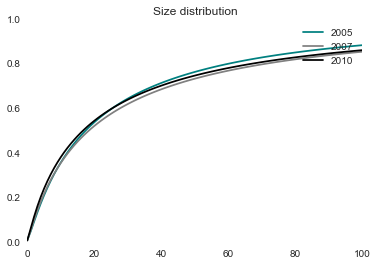

In [110]:
shape05, location05, scale05 = stats.lognorm.fit(size05)
size_m05 = stats.lognorm.cdf(np.arange(0,20000,1), s=shape05, loc=location05, scale=scale05)
plt.plot(np.arange(0,20000,1),size_m05, color='teal', label="2005")

shape07, location07, scale07 = stats.lognorm.fit(size07)
size_m07 = stats.lognorm.cdf(np.arange(0,20000,1), s=shape07, loc=location07, scale=scale07)
plt.plot(np.arange(0,20000,1),size_m07, color='grey', label="2007")

shape10, location10, scale10 = stats.lognorm.fit(size10)
size_m10 = stats.lognorm.cdf(np.arange(0,20000,1), s=shape10, loc=location10, scale=scale10)
plt.plot(np.arange(0,20000,1),size_m10, color='black', label="2010")

plt.title('Size distribution')
plt.xlim(0,100)
plt.legend()
plt.show()

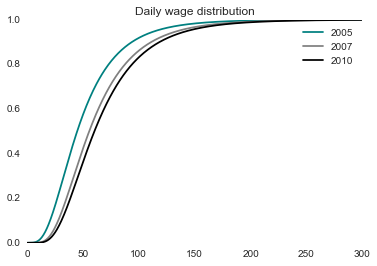

In [111]:
# Daily wage distribution
#plt.hist(wage05, bins=100, range=(0,300), color='teal', normed=True)
shape05, location05, scale05 = stats.lognorm.fit(wage05)
wage_m05 = stats.lognorm.cdf(np.arange(0,300,0.5), s=shape05, loc=location05, scale=scale05)
plt.plot(np.arange(0,300,0.5),wage_m05, color='teal', label="2005")

#plt.hist(wage07, bins=100, range=(0,300), color='grey', normed=True, alpha=0.7)
shape07, location07, scale07 = stats.lognorm.fit(wage07)
wage_m07 = stats.lognorm.cdf(np.arange(0,300,0.5), s=shape07, loc=location07, scale=scale07)
plt.plot(np.arange(0,300,0.5),wage_m07, color='grey', label="2007")
plt.title('Daily wage distribution')

#plt.hist(wage10, bins=100, range=(0,300), color='lightgrey', normed=True, alpha=0.5)
shape10, location10, scale10 = stats.lognorm.fit(wage10)
wage_m10 = stats.lognorm.cdf(np.arange(0,300,0.5), s=shape10, loc=location10, scale=scale10)
plt.plot(np.arange(0,300,0.5),wage_m10, color='black', label="2010")

plt.legend()
plt.show()

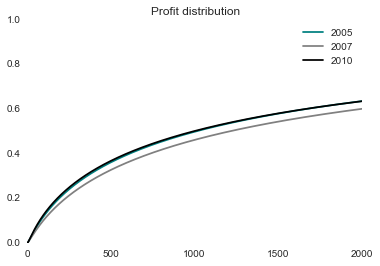

In [112]:
shape05, location05, scale05 = stats.lognorm.fit(profit05)
profit_m05 = stats.lognorm.cdf(np.arange(0,20000,1), s=shape05, loc=location05, scale=scale05)
plt.plot(np.arange(0,20000,1),profit_m05, color='teal', label="2005")

shape07, location07, scale07 = stats.lognorm.fit(profit07)
profit_m07 = stats.lognorm.cdf(np.arange(0,20000,1), s=shape07, loc=location07, scale=scale07)
plt.plot(np.arange(0,20000,1),profit_m07, color='grey', label="2007")

shape10, location10, scale10 = stats.lognorm.fit(profit10)
profit_m10 = stats.lognorm.cdf(np.arange(0,20000,1), s=shape10, loc=location10, scale=scale10)
plt.plot(np.arange(0,20000,1),profit_m10, color='black', label="2010")

plt.title('Profit distribution')
plt.xlim(0,2000)
plt.legend()
plt.show()

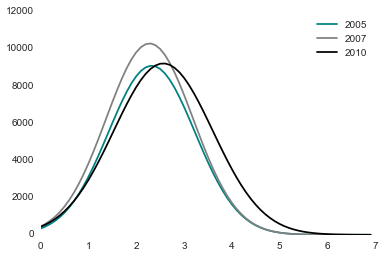

Mean 2005: 2.32297348327, Mean 2007: 2.27875314863, Mean 2010: 2.5641845209


In [113]:
(mu05, sigma05) = stats.norm.fit(skill_w05)
y = pb.normpdf(np.arange(0,7,0.1), mu05, sigma05)
plt.plot(np.arange(0,7,0.1), y*len(skill_w05), color='teal', label="2005")

(mu07, sigma07) = stats.norm.fit(skill_w07)
y = pb.normpdf(np.arange(0,7,0.1), mu07, sigma07)
plt.plot(np.arange(0,7,0.1), y*len(skill_w07), color='grey', label="2007")

(mu10, sigma10) = stats.norm.fit(skill_w10)
y = pb.normpdf(np.arange(0,7,0.1), mu10, sigma10)
plt.plot(np.arange(0,7,0.1), y*len(skill_w10), color='black', label="2010")

plt.legend()
plt.show()

print "Mean 2005: "+str(np.average(skill_w05))+", Mean 2007: "+str(np.average(skill_w07))+", Mean 2010: "+str(np.average(skill_w10))

### 2.2 Pointwise Cdfs

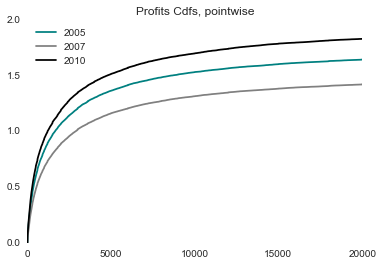

In [114]:
# your array of numbers
num_bins = 2000000
counts05, bin_edges05 = np.histogram(profit05, bins=num_bins, normed=True)
cdf = np.cumsum(counts05)
pb.plot(bin_edges05[1:], cdf, color='teal', label="2005")

counts07, bin_edges07 = np.histogram(profit07, bins=num_bins, normed=True)
cdf = np.cumsum(counts07)
pb.plot(bin_edges07[1:], cdf, color='grey', label="2007")

counts10, bin_edges10 = np.histogram(profit10, bins=num_bins, normed=True)
cdf = np.cumsum(counts10)
pb.plot(bin_edges10[1:], cdf, color='black', label="2010")

plt.legend(loc='best')
plt.title('Profits Cdfs, pointwise')
plt.xlim(0,20000)
plt.show()

In [ ]:
# Wages
num_bins = 100000
counts05, bin_edges05 = np.histogram(wage05, bins=num_bins*100, normed=True)
cdf = np.cumsum(counts05)
pb.plot(bin_edges05[1:], cdf, color='teal', label="2005")

counts07, bin_edges07 = np.histogram(wage07, bins=num_bins*100, normed=True)
cdf = np.cumsum(counts07)
pb.plot(bin_edges07[1:], cdf, color='grey', label="2007")

counts10, bin_edges10 = np.histogram(wage10, bins=num_bins*100, normed=True)
cdf = np.cumsum(counts10)
pb.plot(bin_edges10[1:], cdf, color='black', label="2010")

plt.legend(loc='best')
plt.title('Wages Cdfs, pointwise')
plt.xlim(0,100)
plt.show()

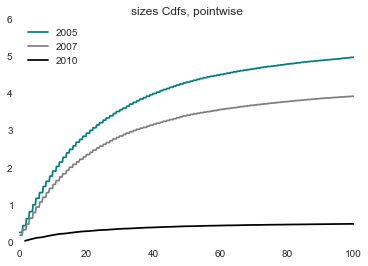

In [121]:
# sizes
num_bins = 100000
counts05, bin_edges05 = np.histogram(size05, bins=num_bins, normed=True)
cdf = np.cumsum(counts05)
pb.plot(bin_edges05[1:], cdf, color='teal', label="2005")

counts07, bin_edges07 = np.histogram(size07, bins=num_bins, normed=True)
cdf07 = np.cumsum(counts07)
pb.plot(bin_edges07[1:], cdf07, color='grey', label="2007")

counts10, bin_edges10 = np.histogram(size10, bins=num_bins, normed=True)
cdf10 = np.cumsum(counts10)
pb.plot(bin_edges10[1:], cdf10, color='black', label="2010")

plt.legend(loc='best')
plt.title('sizes Cdfs, pointwise')
plt.xlim(0,100)
plt.show()

**Final Result:**

**x** -> Education, as $N(2.3229734832697573, 0.9044525298417766)$

**y** -> Log Profits, as $N(6.9190540032193004, 1.9779766196902311)$

**$\theta$** -> Size, as a $LogN(1.4359041752279389, -0.70808555675410711, 17.932538491685392)$

*Alternatives for x: daily wages*

## 3. Scatter plots

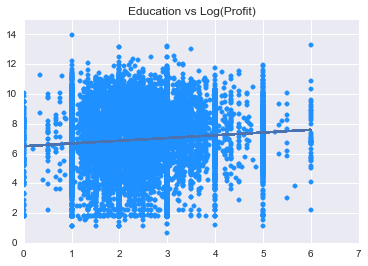

Slope :0.183960847204


In [68]:
# Education vs log(Profit)
plt.scatter(skill_w, np.log(profit), color='dodgerblue')
m, b = np.polyfit(skill_w, np.log(profit), 1)
plt.plot(skill_w, m*skill_w + b, '-')
plt.ylim(0,15.0)
plt.xlim(0,7)
plt.title('Education vs Log(Profit)')
plt.show()
print 'Slope :'+str(m)

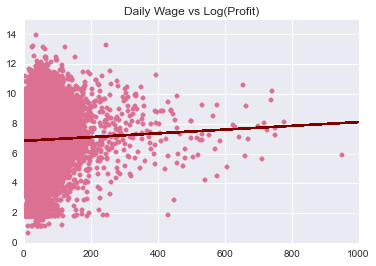

Slope :0.00126204353482


In [69]:
# Daily Wage vs Log(Profit)
plt.scatter(wage, np.log(profit), color='palevioletred')
m, b = np.polyfit(wage, np.log(profit), 1)
plt.plot(wage, m*wage + b, '-', c='maroon')
plt.ylim(0,15.0)
plt.xlim(0,1000)
plt.title('Daily Wage vs Log(Profit)')
plt.show()
print 'Slope :'+str(m)

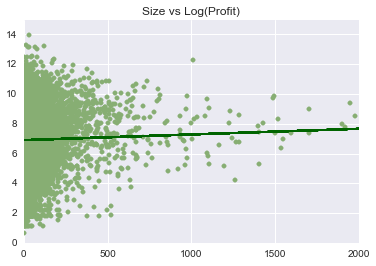

Slope :0.000381771125407


In [72]:
# Size vs Log(Profit)
plt.scatter(size, np.log(profit), color='sage')
m, b = np.polyfit(size, np.log(profit), 1)
plt.plot(size, m*size + b, '-', c='darkgreen')
plt.ylim(0,15.0)
plt.xlim(0,2000)
plt.title('Size vs Log(Profit)')
plt.show()
print 'Slope :'+str(m)